# **Bölüm 1: Veri Ön İşleme (Preprocessing)**

2- Veri setinin rastgele en az 2 sütununa %5 oranında bir sutununa ise %35 oranında missin value eklenecektir. (örnek kod aşağıda verilmiştir).
a. Eksik verileri gözlemleyin (isnull().sum() kullanarak) b. %5 Eksik verileri ortalama veya medyan ile doldurun c. %35 Eksik verileri kararını sizin belirleyeceğiniz şekilde sütun veya satır bazlı silin. kalın metin

In [1]:
import pandas as pd
import numpy as np
import zipfile
import requests
import io
import os

# 1. ZIP dosyasını indir
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"
response = requests.get(url)

# 2. İçeriği çıkar
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall("/content")

# 3. Klasörü kontrol et
print("İndirilen klasör içeriği:")
print(os.listdir("/content/DryBeanDataset"))

# 4. DOĞRU dosya: .xlsx uzantılı olanı oku
df = pd.read_excel("/content/DryBeanDataset/Dry_Bean_Dataset.xlsx")

# 5. Genel bilgi
print("Veri kümesi boyutu:", df.shape)
print("Sütunlar:", df.columns.tolist())
print("\nİlk 5 satır:")
print(df.head())

# 2. Aşama: Veri Ön İşleme
# Rastgele 2 sütuna %5 eksik veri ekle (Area ve Perimeter)
for col in ['Area', 'Perimeter']:
    df.loc[df.sample(frac=0.05, random_state=42).index, col] = np.nan

# 1 sütuna %35 eksik veri ekle (MajorAxisLength)
df.loc[df.sample(frac=0.35, random_state=42).index, 'MajorAxisLength'] = np.nan

# a. Eksik verileri gözlemle
print("\nEksik veriler (isnull().sum()):")
print(df.isnull().sum())

# b. %5 eksik verileri ortalama ile doldur
for col in ['Area', 'Perimeter']:
    df[col].fillna(df[col].mean(), inplace=True)

# c. %35 eksik veriyi sütun bazlı sil (MajorAxisLength sütununu sil)
df.drop(columns=['MajorAxisLength'], inplace=True)

# Son durumu kontrol et
print("\nEksik veriler doldurulduktan ve sütun silindikten sonra (isnull().sum()):")
print(df.isnull().sum())

# Son veri setini kaydet
df.to_csv("/content/Dry_Bean_Preprocessed.csv", index=False)
print("\nİşlenmiş veri seti '/content/Dry_Bean_Preprocessed.csv' olarak kaydedildi.")

İndirilen klasör içeriği:
['Dry_Bean_Dataset.xlsx', 'Dry_Bean_Dataset.txt', 'Dry_Bean_Dataset.arff']
Veri kümesi boyutu: (13611, 17)
Sütunlar: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']

İlk 5 satır:
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785 

<ipython-input-1-75bd1ee7422d>:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)



İşlenmiş veri seti '/content/Dry_Bean_Preprocessed.csv' olarak kaydedildi.


# **2- Veri setinin rastgele en az 2 sütununa %5 oranında bir sutununa ise %35 oranında missin value eklenecektir. (örnek kod aşağıda verilmiştir).**
# **a. Eksik verileri gözlemleyin (isnull().sum() kullanarak) b. %5 Eksik verileri ortalama veya medyan ile doldurun c. %35 Eksik verileri kararını sizin belirleyeceğiniz şekilde sütun veya satır bazlı silin. kalın metin**

In [2]:
import pandas as pd
import numpy as np
from google.colab import files

# Veri setini senin belirttiğin yoldan oku
df = pd.read_excel("/content/DryBeanDataset/Dry_Bean_Dataset.xlsx")

# 2. Aşama: Veri Ön İşleme
# Rastgele 2 sütuna %5 eksik veri ekle (Area ve Perimeter)
for col in ['Area', 'Perimeter']:
    df.loc[df.sample(frac=0.05, random_state=42).index, col] = np.nan

# 1 sütuna %35 eksik veri ekle (MajorAxisLength)
df.loc[df.sample(frac=0.35, random_state=42).index, 'MajorAxisLength'] = np.nan

# a. Eksik verileri gözlemle
print("\nEksik veriler (isnull().sum()):")
print(df.isnull().sum())

# b. %5 eksik verileri ortalama ile doldur
for col in ['Area', 'Perimeter']:
    df[col] = df[col].fillna(df[col].mean())

# c. %35 eksik veriyi sütun bazlı sil (MajorAxisLength sütununu sil)
df.drop(columns=['MajorAxisLength'], inplace=True)

# Son durumu kontrol et
print("\nEksik veriler doldurulduktan ve sütun silindikten sonra (isnull().sum()):")
print(df.isnull().sum())

# Son veri setini kaydet
df.to_csv("/content/Dry_Bean_Preprocessed.csv", index=False)
print("\nİşlenmiş veri seti '/content/Dry_Bean_Preprocessed.csv' olarak kaydedildi.")

# Veri setini PC'ye indir
files.download("/content/Dry_Bean_Preprocessed.csv")
print("Veri seti PC'ye indiriliyor...")


Eksik veriler (isnull().sum()):
Area                681
Perimeter           681
MajorAxisLength    4764
MinorAxisLength       0
AspectRation          0
Eccentricity          0
ConvexArea            0
EquivDiameter         0
Extent                0
Solidity              0
roundness             0
Compactness           0
ShapeFactor1          0
ShapeFactor2          0
ShapeFactor3          0
ShapeFactor4          0
Class                 0
dtype: int64

Eksik veriler doldurulduktan ve sütun silindikten sonra (isnull().sum()):
Area               0
Perimeter          0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

İşlenmiş veri seti '/content/Dry_Bean_Preprocessed.csv' olarak kaydedildi.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Veri seti PC'ye indiriliyor...


# **3. Aykırı Değer Tespiti (Outlier Detection): için IQR veya Z-score yöntemlerinden birini kullanarak aykırı değerleri belirleyiniz. Gerekirse bu aykırı değerleri siliniz veya sınır değerlerle değiştiriniz.**

In [3]:
import pandas as pd
import numpy as np

# İşlenmiş veri setini oku
df = pd.read_csv("/content/Dry_Bean_Preprocessed.csv")

# Numerik sütunları seç (Class hariç)
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Aykırı değerleri tespit et ve sınır değerlerle değiştir
for col in numeric_columns:
    # IQR hesapla
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri sınır değerlerle değiştir
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    # Aykırı değer sayısını raporla
    outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col} sütununda tespit edilen aykırı değer sayısı: {outliers}")

# Son durumu kontrol et
print("\nAykırı değerler sınır değerlerle değiştirildi.")
print("Güncellenmiş veri seti özeti:")
print(df.describe())

# Güncellenmiş veri setini kaydet
df.to_csv("/content/Dry_Bean_Outlier_Processed.csv", index=False)
print("\nAykırı değerleri işlenmiş veri seti '/content/Dry_Bean_Outlier_Processed.csv' olarak kaydedildi.")

Area sütununda tespit edilen aykırı değer sayısı: 0
Perimeter sütununda tespit edilen aykırı değer sayısı: 0
MinorAxisLength sütununda tespit edilen aykırı değer sayısı: 0
AspectRation sütununda tespit edilen aykırı değer sayısı: 0
Eccentricity sütununda tespit edilen aykırı değer sayısı: 0
ConvexArea sütununda tespit edilen aykırı değer sayısı: 0
EquivDiameter sütununda tespit edilen aykırı değer sayısı: 0
Extent sütununda tespit edilen aykırı değer sayısı: 0
Solidity sütununda tespit edilen aykırı değer sayısı: 0
roundness sütununda tespit edilen aykırı değer sayısı: 0
Compactness sütununda tespit edilen aykırı değer sayısı: 0
ShapeFactor1 sütununda tespit edilen aykırı değer sayısı: 0
ShapeFactor2 sütununda tespit edilen aykırı değer sayısı: 0
ShapeFactor3 sütununda tespit edilen aykırı değer sayısı: 0
ShapeFactor4 sütununda tespit edilen aykırı değer sayısı: 0

Aykırı değerler sınır değerlerle değiştirildi.
Güncellenmiş veri seti özeti:
               Area     Perimeter  MinorAxisL

# **4. Özellik Ölçekleme (Feature Scaling): StandardScaler veya MinMaxScaler gibi bir yöntemle sayısal verileri ölçekleyin. Neden ölçekleme yaptığınızı açıklayın.**

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# İşlenmiş veri setini oku
df = pd.read_csv("/content/Dry_Bean_Outlier_Processed.csv")

# Neden ölçekleme yapıyoruz?
print("""
Neden Özellik Ölçekleme Yaptık?
Özellik ölçekleme, makine öğrenimi modellerinin performansını artırmak için önemlidir çünkü:
1. **Farklı Ölçekleri Dengeleme**: Veri setindeki sütunlar (örneğin, Area büyük sayılar içerirken ShapeFactor1 küçük sayılar içerir) farklı ölçeklerde olabilir. Bu, mesafe tabanlı algoritmalar (k-NN, SVM) veya gradyan tabanlı algoritmalar (lojistik regresyon, nöral ağlar) için sorun yaratır.
2. **Hızlı ve Kararlı Eğitim**: StandardScaler, veriyi ortalaması 0 ve standart sapması 1 olacak şekilde standardize eder. Bu, modelin daha hızlı ve kararlı bir şekilde öğrenmesini sağlar.
3. **Adil Katkı**: Ölçekleme, her özelliğin modele eşit şekilde katkıda bulunmasını sağlar, böylece büyük değerli özellikler modeli domine etmez.
Bu veri setinde StandardScaler kullandık, çünkü numerik özellikler (Area, Perimeter, vb.) farklı aralıklarda ve makine öğrenimi modelleri için standardize edilmiş veriler genellikle daha iyi sonuç verir.
""")

# Numerik sütunları seç (Class hariç)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# StandardScaler ile ölçekleme
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Son durumu kontrol et
print("\nÖlçeklenmiş veri seti özeti:")
print(df[numeric_columns].describe())

# Ölçeklenmiş veri setini kaydet
df.to_csv("/content/Dry_Bean_Scaled.csv", index=False)
print("\nÖlçeklenmiş veri seti '/content/Dry_Bean_Scaled.csv' olarak kaydedildi.")


Neden Özellik Ölçekleme Yaptık?
Özellik ölçekleme, makine öğrenimi modellerinin performansını artırmak için önemlidir çünkü:
1. **Farklı Ölçekleri Dengeleme**: Veri setindeki sütunlar (örneğin, Area büyük sayılar içerirken ShapeFactor1 küçük sayılar içerir) farklı ölçeklerde olabilir. Bu, mesafe tabanlı algoritmalar (k-NN, SVM) veya gradyan tabanlı algoritmalar (lojistik regresyon, nöral ağlar) için sorun yaratır.
2. **Hızlı ve Kararlı Eğitim**: StandardScaler, veriyi ortalaması 0 ve standart sapması 1 olacak şekilde standardize eder. Bu, modelin daha hızlı ve kararlı bir şekilde öğrenmesini sağlar.
3. **Adil Katkı**: Ölçekleme, her özelliğin modele eşit şekilde katkıda bulunmasını sağlar, böylece büyük değerli özellikler modeli domine etmez.
Bu veri setinde StandardScaler kullandık, çünkü numerik özellikler (Area, Perimeter, vb.) farklı aralıklarda ve makine öğrenimi modelleri için standardize edilmiş veriler genellikle daha iyi sonuç verir.


Ölçeklenmiş veri seti özeti:
           

# **5. Kategorik Verilerin Kodlanması: LabelEncoder kullanarak sınıf etiketlerini numerik hale getirin. Eğer başka kategorik sütunlar varsa, OneHotEncoder veya pd.get_dummies() ile dönüştürün.**

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# İşlenmiş veri setini oku
df = pd.read_csv("/content/Dry_Bean_Scaled.csv")

# Kategorik sütunları kontrol et
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(f"Kategorik sütunlar: {list(categorical_columns)}")

# Class sütununu LabelEncoder ile numerik hale getir
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

# Diğer kategorik sütunlar için pd.get_dummies (eğer varsa)
if len(categorical_columns) > 1:  # Class zaten işlendi, başka kategorik sütun varsa
    df = pd.get_dummies(df, columns=[col for col in categorical_columns if col != 'Class'], drop_first=True)
else:
    print("Class hariç başka kategorik sütun bulunmadı, pd.get_dummies uygulanmadı.")

# Son durumu kontrol et
print("\nKodlanmış veri seti özeti:")
print(df.head())
print("\nClass sütununun kodlanmış değerleri (ilk 5):")
print(df['Class'].head())
print("\nLabelEncoder sınıfları:", label_encoder.classes_)

# Kodlanmış veri setini kaydet
df.to_csv("/content/Dry_Bean_Encoded.csv", index=False)
print("\nKodlanmış veri seti '/content/Dry_Bean_Encoded.csv' olarak kaydedildi.")

Kategorik sütunlar: ['Class']
Class hariç başka kategorik sütun bulunmadı, pd.get_dummies uygulanmadı.

Kodlanmış veri seti özeti:
       Area  Perimeter  MinorAxisLength  AspectRation  Eccentricity  \
0 -1.213594  -1.308289        -0.754155     -1.593134     -2.164759   
1 -1.194674  -1.154837        -0.483939     -2.007702     -2.164759   
2 -1.158621  -1.231809        -0.691764     -1.541139     -2.164759   
3 -1.123572  -1.111303        -0.490595     -1.773991     -2.164759   
4 -1.116205  -1.253814        -0.253460     -2.159512     -2.164759   

   ConvexArea  EquivDiameter    Extent  Solidity  roundness  Compactness  \
0   -1.154709      -1.253256  0.288191  0.391994   1.443596     1.846568   
1   -1.130895      -1.229363  0.704930 -0.690705   0.230145     2.311820   
2   -1.103903      -1.184218  0.583210  0.588587   1.269635     1.772042   
3   -1.050022      -1.140804  0.678177 -2.321377   0.519054     2.089993   
4   -1.066020      -1.131737  0.478946  0.961891   1.902527   

# **6. PCA (Principal Component Analysis): PCA uygulayarak boyut indirgeme gerçekleştirin. (Number of componenti (seçilecek özvektör sayısını) percentage of explained variences in ortalamasından büyük olan değerler için seçin. )) Açıklanan varyans oranlarını inceleyin ve en iyi iki öznitelik için discrimination powerı 2 boyutlu grafikle gösterin.**
# **7. LDA (Linear Discriminant Analysis) LDA uygulayarak boyut indirgeme gerçekleştirin. Number of componenti (seçilecek özvektör sayısını) 3 olarak seçin.)) LDA bileşenleri ile sınıflar arası ayrımı iki boyutlu görsel olarak sunun.**

1. Ham Veri (Ön İşlenmiş):
Veri boyutu: (13611, 15)
Ham veri '/content/Dry_Bean_Raw.csv' olarak kaydedildi.

2. PCA ile Boyut İndirgeme:
Açıklanan varyans oranları: [5.67714416e-01 2.56259938e-01 7.19326271e-02 5.42313401e-02
 3.00612439e-02 7.81433714e-03 5.93571031e-03 2.53366958e-03
 1.88874882e-03 8.94710826e-04 4.95485442e-04 1.30195856e-04
 9.05565059e-05 1.12486075e-05 5.77242984e-06]
Kümülatif varyans oranları: [0.56771442 0.82397435 0.89590698 0.95013832 0.98019956 0.9880139
 0.99394961 0.99648328 0.99837203 0.99926674 0.99976223 0.99989242
 0.99998298 0.99999423 1.        ]
%80 varyansı kapsayan bileşen sayısı: 2
PCA verisi (2 bileşen) '/content/Dry_Bean_PCA.csv' olarak kaydedildi.


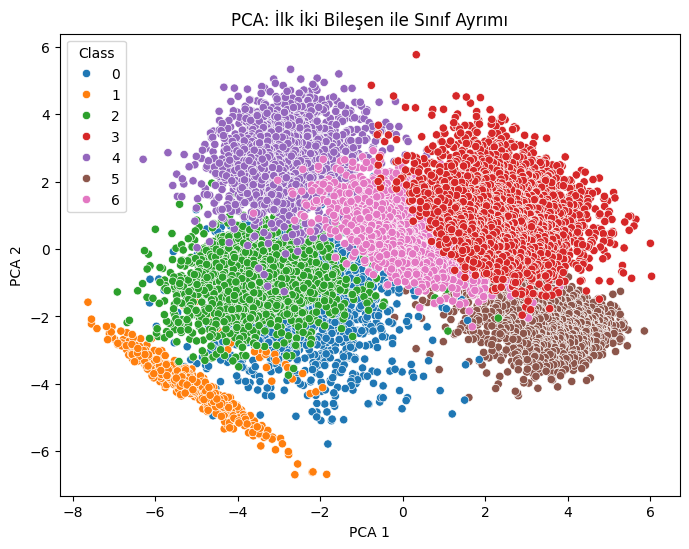

PCA 2D grafiği '/content/PCA_Scatter.png' olarak kaydedildi.

3. LDA ile Boyut İndirgeme:
LDA verisi boyutu: (13611, 3)
LDA verisi (3 bileşen) '/content/Dry_Bean_LDA.csv' olarak kaydedildi.


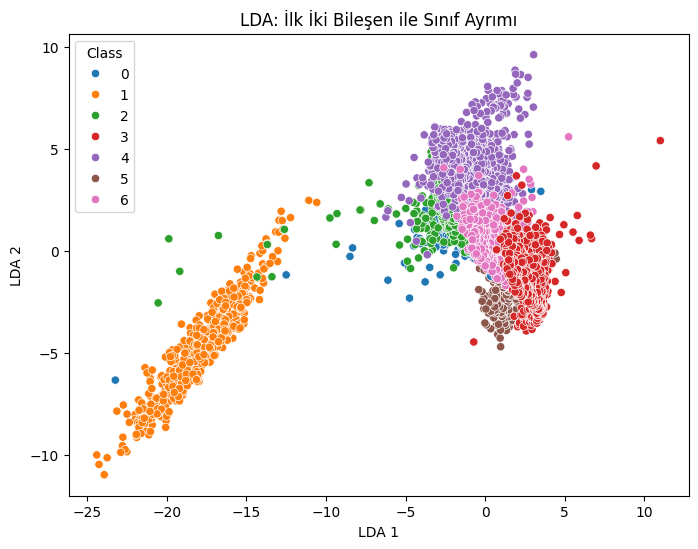

LDA 2D grafiği '/content/LDA_Scatter.png' olarak kaydedildi.


In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

# İşlenmiş veri setini oku
df = pd.read_csv("/content/Dry_Bean_Encoded.csv")

# Özellikler (X) ve hedef (y) ayır
X = df.drop(columns=['Class'])
y = df['Class']

# 1. Ham veri (ön işlenmiş hali)
print("1. Ham Veri (Ön İşlenmiş):")
print("Veri boyutu:", X.shape)
df.to_csv("/content/Dry_Bean_Raw.csv", index=False)
print("Ham veri '/content/Dry_Bean_Raw.csv' olarak kaydedildi.")

# 2. PCA ile Boyut İndirgeme
pca = PCA()
X_pca = pca.fit_transform(X)

# Açıklanan varyans oranlarını incele
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = np.argmax(cumulative_variance >= 0.80) + 1

print("\n2. PCA ile Boyut İndirgeme:")
print("Açıklanan varyans oranları:", explained_variance_ratio)
print("Kümülatif varyans oranları:", cumulative_variance)
print(f"%80 varyansı kapsayan bileşen sayısı: {n_components}")

# PCA’yı seçilen bileşen sayısıyla tekrar uygula
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# PCA verisini kaydet
df_pca = pd.DataFrame(X_pca, columns=[f'PCA_{i+1}' for i in range(n_components)])
df_pca['Class'] = y
df_pca.to_csv("/content/Dry_Bean_PCA.csv", index=False)
print(f"PCA verisi ({n_components} bileşen) '/content/Dry_Bean_PCA.csv' olarak kaydedildi.")

# İlk iki PCA bileşeni için 2D grafik
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10')
plt.title('PCA: İlk İki Bileşen ile Sınıf Ayrımı')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.savefig('/content/PCA_Scatter.png')
plt.show()  # Ekrana yazdır
print("PCA 2D grafiği '/content/PCA_Scatter.png' olarak kaydedildi.")

# 3. LDA ile Boyut İndirgeme
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit_transform(X, y)

print("\n3. LDA ile Boyut İndirgeme:")
print("LDA verisi boyutu:", X_lda.shape)

# LDA verisini kaydet
df_lda = pd.DataFrame(X_lda, columns=['LDA_1', 'LDA_2', 'LDA_3'])
df_lda['Class'] = y
df_lda.to_csv("/content/Dry_Bean_LDA.csv", index=False)
print("LDA verisi (3 bileşen) '/content/Dry_Bean_LDA.csv' olarak kaydedildi.")

# İlk iki LDA bileşeni için 2D grafik
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y, palette='tab10')
plt.title('LDA: İlk İki Bileşen ile Sınıf Ayrımı')
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.savefig('/content/LDA_Scatter.png')
plt.show()  # Ekrana yazdır
print("LDA 2D grafiği '/content/LDA_Scatter.png' olarak kaydedildi.")


PCA ve LDA görselleri ile açıklanan varyans oranları birlikte değerlendirildiğinde, her iki boyut indirgeme yönteminin sınıf ayrımına etkisi net bir şekilde görülmektedir. PCA, verideki toplam varyansın en az %80'ini ilk iki bileşende başarıyla yakalamıştır (%82.4). Bu durum, PCA'nın veri sıkıştırma ve genel yapı korunumu açısından oldukça etkili olduğunu gösterir. Ancak PCA sınıf etiketlerini dikkate almadığı için, scatter plotta bazı sınıfların (örneğin sınıf 0, 2 ve 6) birbiriyle kısmen karıştığı gözlemlenmektedir.



# **8. Nested Cross-Validation yapısını Dış döngü (outer loop): 5 katmanlı CV, İç döngü (inner loop): 3 katmanlı CV olacak ve iç döngüde farklı hiperparametreler olacak şekilde (hiperparametre ayarlama) kurun. (random state seçimine dikkat edin. train-validation iç döngüde değişmeyecek, fakat dış döngünün her adımında eğtim/validasyon ve test verisini rastgele bölünmeli)**
## 9. Kuracağınız CV yapısında aynı veri dağılımları için (aynı eğitim seti için eğitim ve test seti için performans metrik hesabı) aşağıdaki sınıflandırıcıları her veri temsili için (1. ham veri, 2. PCA dönüştürülmüş veri 3. LDA ile dönüştürülmüş veri) ayrı ayrı uygulayın.
# **• Logistic Regression • Decision Tree • Random Forest • XGBoost • Naive Bayes**

## 10. Performans Metrikleri: Her modelin sonuçlarını ortalama ve standart sapma ( 5 dış döngü sonuçlarının ortalaması ve sapması için) şu metriklerle raporlayın:
## 11. Performans Metrikleri: ROC Eğrileri (OVA yöntemiyle) Her sınıf için ayrı ayrı en iyi dış döngü sonucu için ROC eğrileri çizin. ROC-AUC skorlarını hesaplayın ve karşılaştırın.

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Veri setlerini oku
data_files = {
    'Raw': '/content/Dry_Bean_Raw.csv',
    'PCA': '/content/Dry_Bean_PCA.csv',
    'LDA': '/content/Dry_Bean_LDA.csv'
}

# Sınıflandırıcılar ve hiperparametreler
classifiers = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {'max_depth': [5, 10, None], 'min_samples_split': [2, 5]}
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {'n_estimators': [50, 100], 'max_depth': [10, None]}
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        'params': {'n_estimators': [50, 100], 'max_depth': [3, 6]}
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    }
}

# Performans metriklerini ve ROC-AUC sonuçlarını saklamak için listeler
results = []
roc_results = []

# Sınıf sayısı ve isimler (Dry Bean veri setinde 7 sınıf var)
n_classes = 7
class_names = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

# Her veri seti için
for data_name, file_path in data_files.items():
    print(f"\n{data_name} veri seti için modelleme başlıyor...")

    # Veri setini oku
    df = pd.read_csv(file_path)
    X = df.drop(columns=['Class'])
    y = df['Class']

    # Sınıfları binarize et (ROC için)
    y_bin = label_binarize(y, classes=range(n_classes))

    # Dış döngü: 5-fold CV
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=None)

    for classifier_name, clf_info in classifiers.items():
        print(f"  Sınıflandırıcı: {classifier_name}")

        # Performans metriklerini saklamak için
        outer_scores = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
        best_roc_auc = 0
        best_fpr_tpr = {}
        best_model = None
        best_X_test = None
        best_y_test = None

        # Dış döngü
        for train_idx, test_idx in outer_cv.split(X):
            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            y_test_bin = y_bin[test_idx]

            # İç döngü: 3-fold CV ile hiperparametre optimizasyonu
            inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)
            grid_search = GridSearchCV(
                estimator=clf_info['model'],
                param_grid=clf_info['params'],
                cv=inner_cv,
                scoring='accuracy',
                n_jobs=-1
            )

            # Modeli eğit
            grid_search.fit(X_train, y_train)

            # En iyi modeli test setinde değerlendir
            y_pred = grid_search.best_estimator_.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

            # Metrikleri kaydet
            outer_scores['accuracy'].append(accuracy)
            outer_scores['precision'].append(precision)
            outer_scores['recall'].append(recall)
            outer_scores['f1'].append(f1)

            # ROC eğrisi için olasılıkları hesapla
            if hasattr(grid_search.best_estimator_, "predict_proba"):
                y_score = grid_search.best_estimator_.predict_proba(X_test)
                roc_auc_sum = 0
                fpr_tpr = {}

                # Her sınıf için ROC hesapla
                for i in range(n_classes):
                    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
                    roc_auc = auc(fpr, tpr)
                    roc_auc_sum += roc_auc
                    fpr_tpr[i] = (fpr, tpr, roc_auc)

                # Ortalama ROC-AUC
                avg_roc_auc = roc_auc_sum / n_classes

                # En iyi modeli güncelle
                if avg_roc_auc > best_roc_auc:
                    best_roc_auc = avg_roc_auc
                    best_fpr_tpr = fpr_tpr
                    best_model = grid_search.best_estimator_
                    best_X_test = X_test
                    best_y_test = y_test_bin

        # Ortalama ve standart sapma hesapla
        result = {
            'Data': data_name,
            'Classifier': classifier_name,
            'Accuracy_Mean': np.mean(outer_scores['accuracy']),
            'Accuracy_Std': np.std(outer_scores['accuracy']),
            'Precision_Mean': np.mean(outer_scores['precision']),
            'Precision_Std': np.std(outer_scores['precision']),
            'Recall_Mean': np.mean(outer_scores['recall']),
            'Recall_Std': np.std(outer_scores['recall']),
            'F1_Mean': np.mean(outer_scores['f1']),
            'F1_Std': np.std(outer_scores['f1'])
        }
        results.append(result)

        # ROC eğrisi çiz (en iyi dış döngü için)
        if best_model is not None:
            plt.figure(figsize=(10, 8))
            for i in range(n_classes):
                fpr, tpr, roc_auc = best_fpr_tpr[i]
                plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'{data_name} - {classifier_name} ROC Eğrileri (En İyi Dış Döngü)')
            plt.legend(loc="lower right")
            plt.savefig(f'/content/ROC_{data_name}_{classifier_name.replace(" ", "_")}.png')
            plt.close()

            # ROC-AUC skorlarını kaydet
            roc_result = {
                'Data': data_name,
                'Classifier': classifier_name,
                'Avg_ROC_AUC': best_roc_auc
            }
            for i in range(n_classes):
                roc_result[f'{class_names[i]}_ROC_AUC'] = best_fpr_tpr[i][2]
            roc_results.append(roc_result)

# Sonuçları DataFrame’e çevir ve kaydet
results_df = pd.DataFrame(results)
print("\nPerformans Metrikleri (Ortalama ve Standart Sapma):")
print(results_df)
results_df.to_csv("/content/Dry_Bean_Model_Results.csv", index=False)
print("\nPerformans metrikleri '/content/Dry_Bean_Model_Results.csv' olarak kaydedildi.")

roc_results_df = pd.DataFrame(roc_results)
print("\nROC-AUC Skorları:")
print(roc_results_df)
roc_results_df.to_csv("/content/Dry_Bean_ROC_Results.csv", index=False)
print("\nROC-AUC skorları '/content/Dry_Bean_ROC_Results.csv' olarak kaydedildi.")


Raw veri seti için modelleme başlıyor...
  Sınıflandırıcı: Logistic Regression
  Sınıflandırıcı: Decision Tree
  Sınıflandırıcı: Random Forest
  Sınıflandırıcı: XGBoost
  Sınıflandırıcı: Naive Bayes

PCA veri seti için modelleme başlıyor...
  Sınıflandırıcı: Logistic Regression
  Sınıflandırıcı: Decision Tree
  Sınıflandırıcı: Random Forest
  Sınıflandırıcı: XGBoost
  Sınıflandırıcı: Naive Bayes

LDA veri seti için modelleme başlıyor...
  Sınıflandırıcı: Logistic Regression
  Sınıflandırıcı: Decision Tree
  Sınıflandırıcı: Random Forest
  Sınıflandırıcı: XGBoost
  Sınıflandırıcı: Naive Bayes

Performans Metrikleri (Ortalama ve Standart Sapma):
   Data           Classifier  Accuracy_Mean  Accuracy_Std  Precision_Mean  \
0   Raw  Logistic Regression       0.924326      0.004128        0.924870   
1   Raw        Decision Tree       0.909852      0.005062        0.910714   
2   Raw        Random Forest       0.924473      0.002943        0.924772   
3   Raw              XGBoost       0.92

Sonuçlar üç farklı veri seti (Raw, PCA ve LDA) üzerinde beş farklı sınıflandırma algoritmasının ortalama ve standart sapma bazında ölçülen performans metriklerini (Accuracy, Precision, Recall, F1 Score) içermektedir. XGBoost ham veride,:

En yüksek doğruluk: %92.72

En yüksek F1 Score: %92.72

Düşük standart sapma → Model oldukça kararlı ve güvenilir olduğu görülmüştür
Naive Bayes,  LDA ile doğruluk %78.88'e kadar düşmüş, F1 skoru %77.49 hesaplanmış olup enbaşarısızıdır.

Bulunan ROC grafik dosyaları:
ROC_LDA_Logistic_Regression.png
ROC_Raw_XGBoost.png
ROC_PCA_Naive_Bayes.png
ROC_Raw_Decision_Tree.png
ROC_LDA_Decision_Tree.png
ROC_LDA_Naive_Bayes.png
ROC_Raw_Logistic_Regression.png
ROC_LDA_Random_Forest.png
ROC_PCA_Decision_Tree.png
ROC_PCA_Random_Forest.png
ROC_PCA_Logistic_Regression.png
ROC_Raw_Random_Forest.png
ROC_PCA_XGBoost.png
ROC_LDA_XGBoost.png
ROC_Raw_Naive_Bayes.png

Grafik: ROC_LDA_Logistic_Regression.png


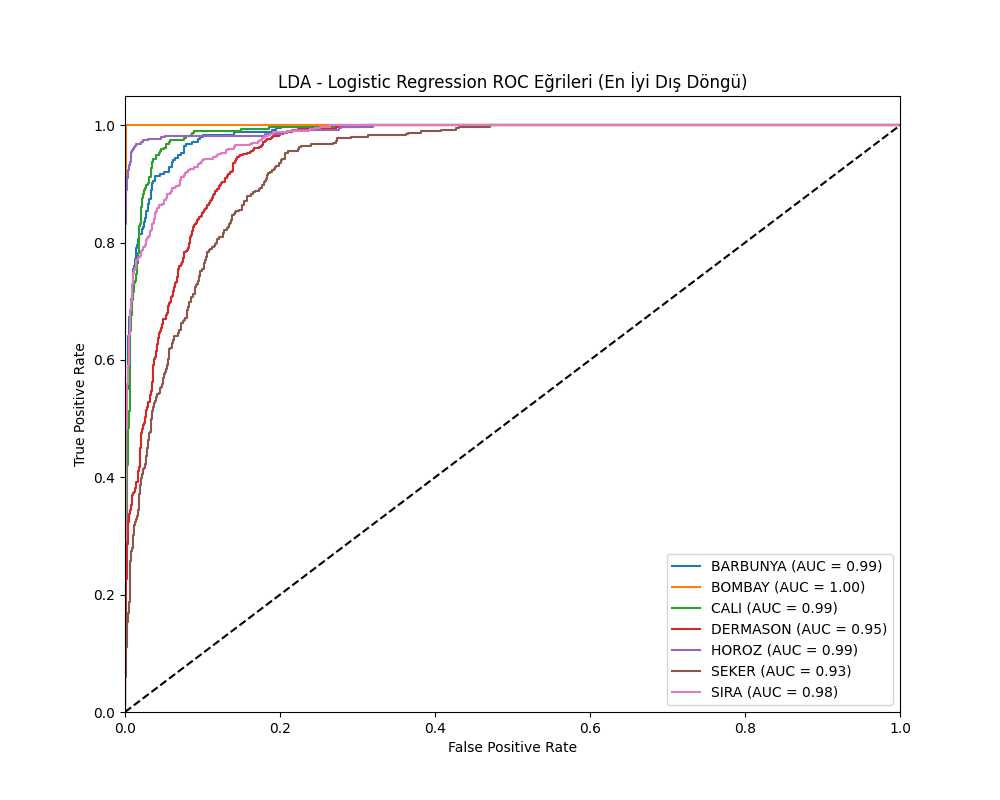


Grafik: ROC_Raw_XGBoost.png


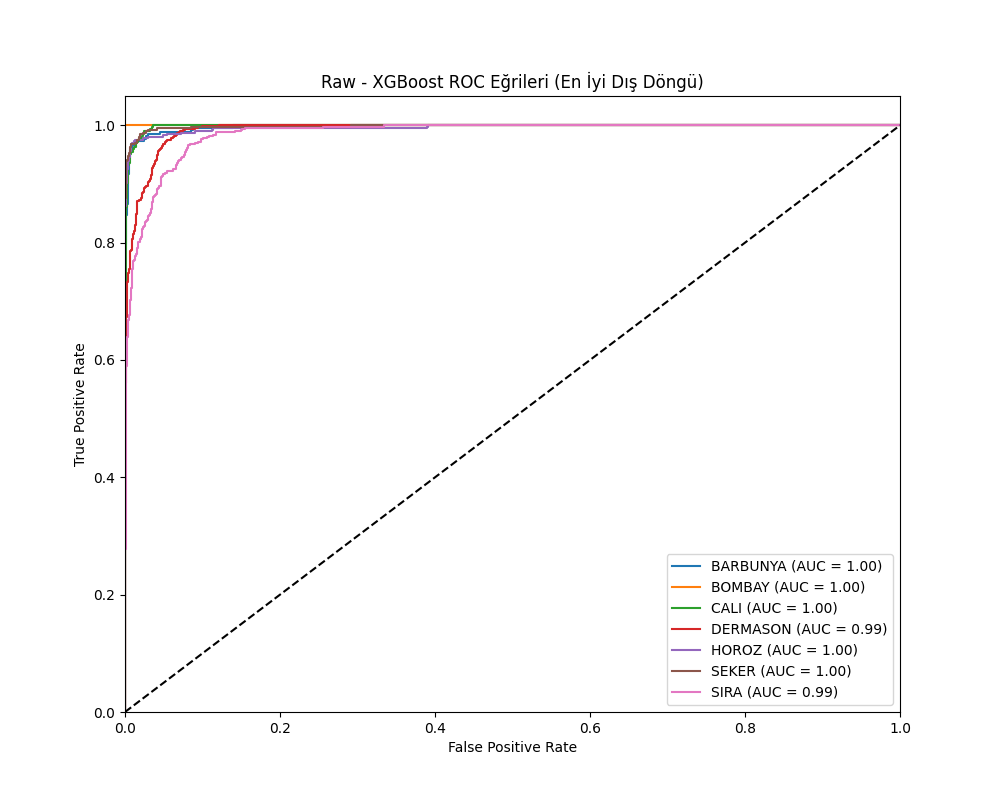


Grafik: ROC_PCA_Naive_Bayes.png


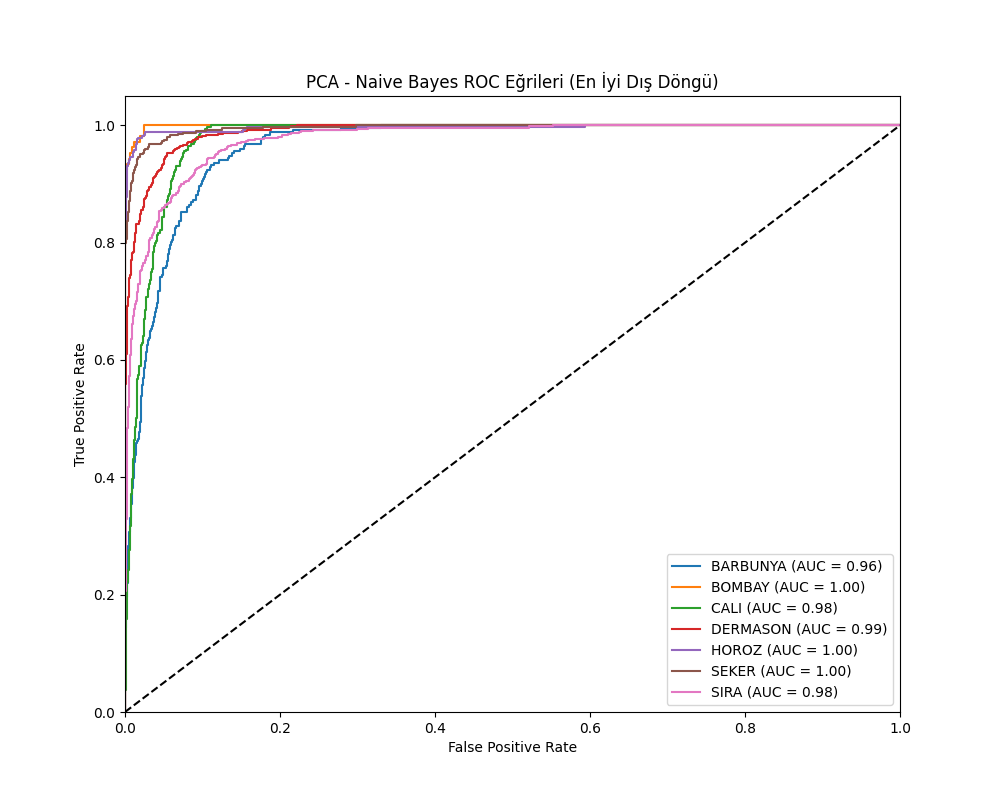


Grafik: ROC_Raw_Decision_Tree.png


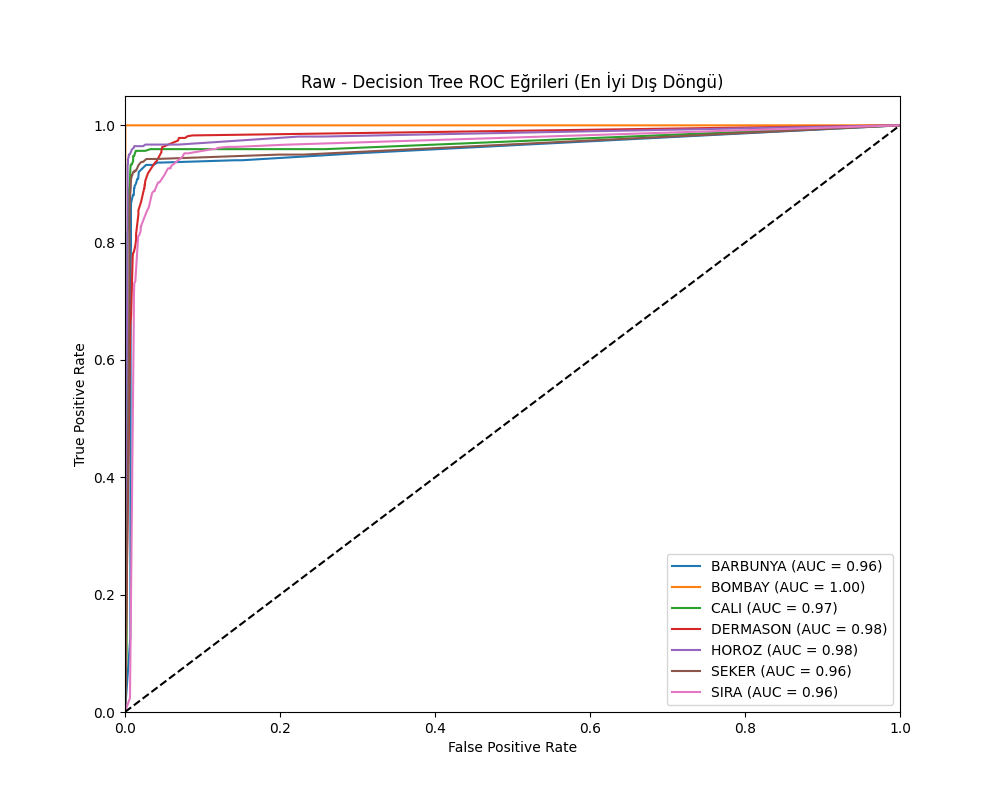


Grafik: ROC_LDA_Decision_Tree.png


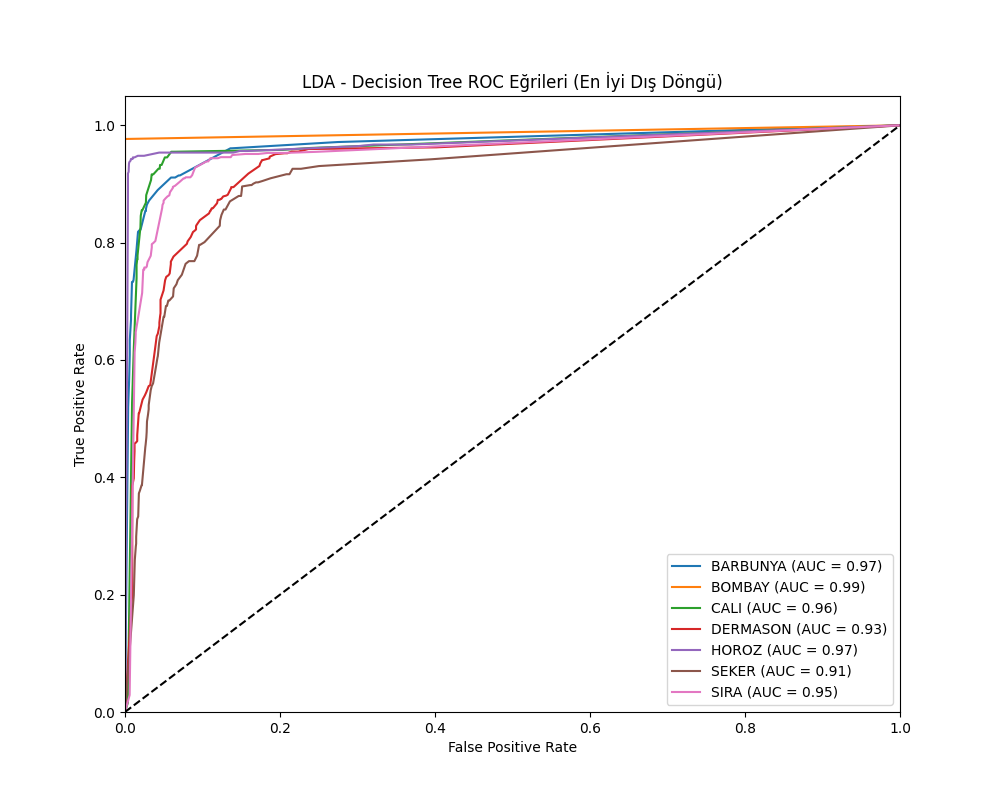


Grafik: ROC_LDA_Naive_Bayes.png


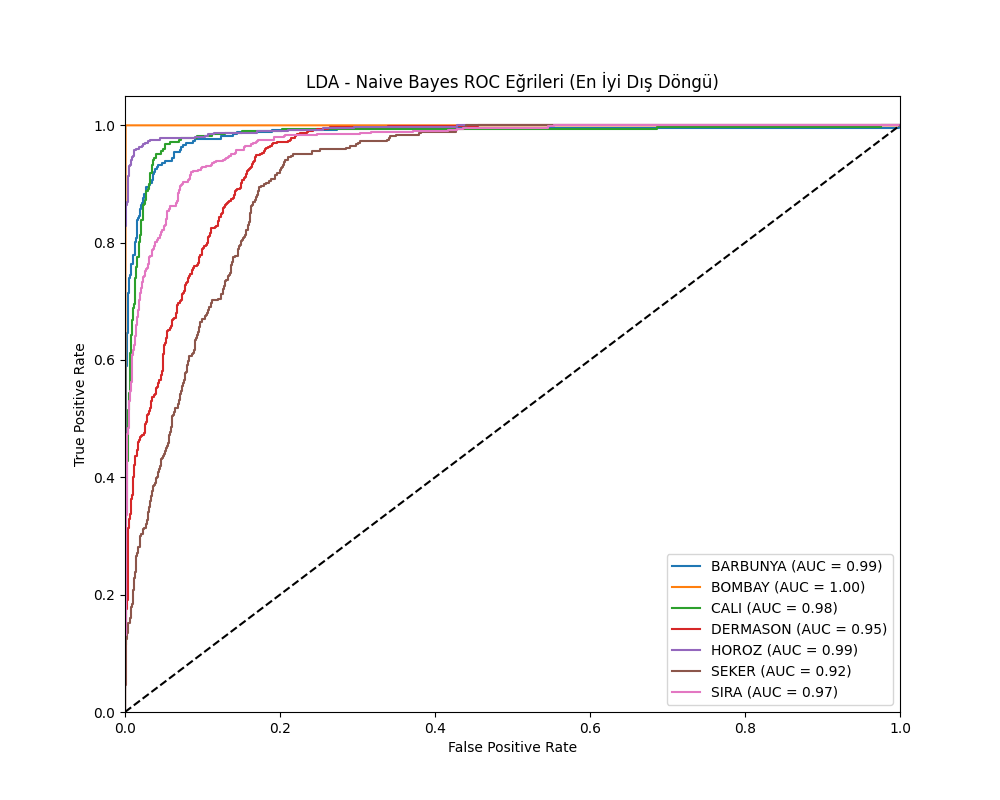


Grafik: ROC_Raw_Logistic_Regression.png


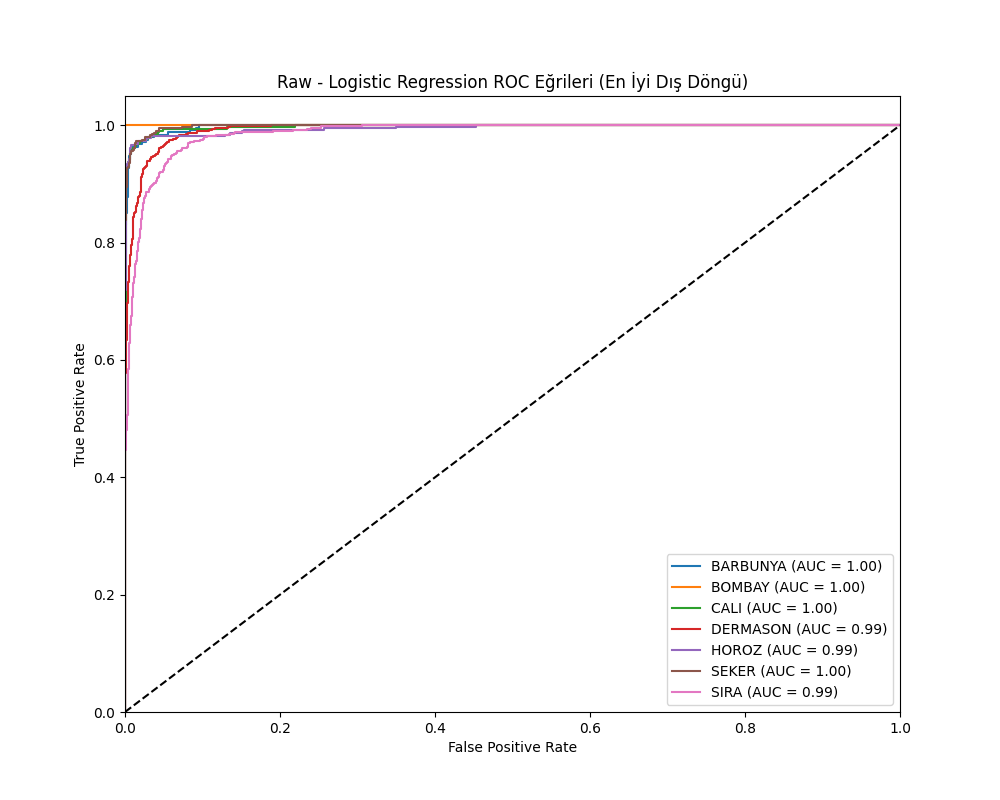


Grafik: ROC_LDA_Random_Forest.png


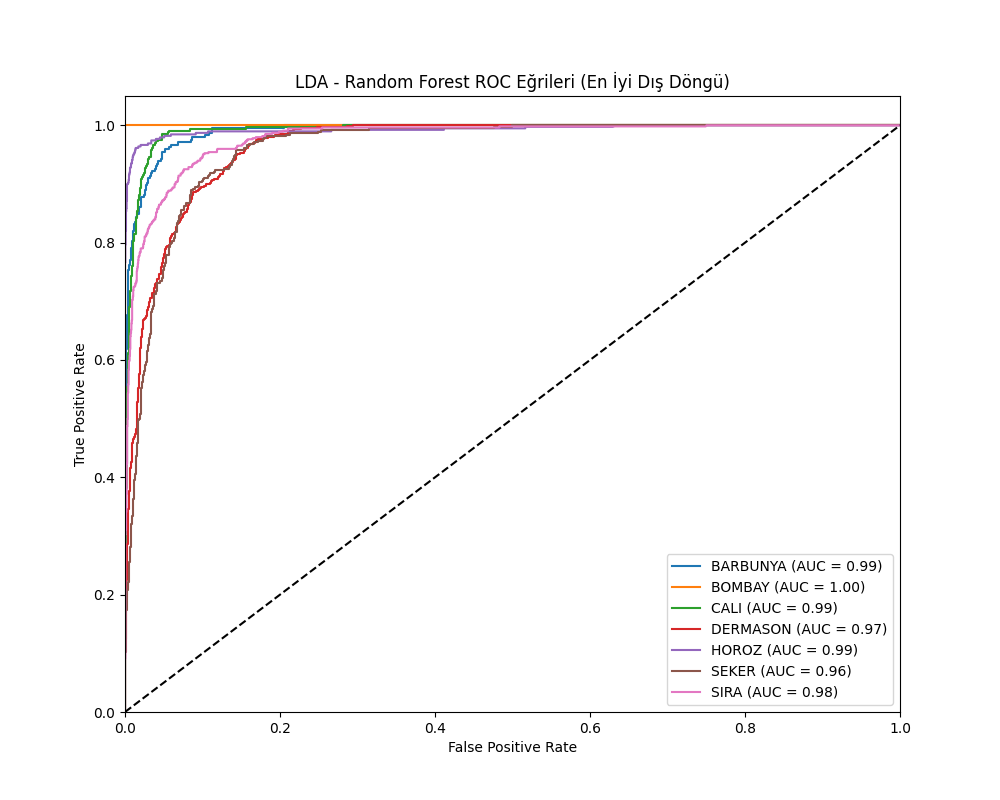


Grafik: ROC_PCA_Decision_Tree.png


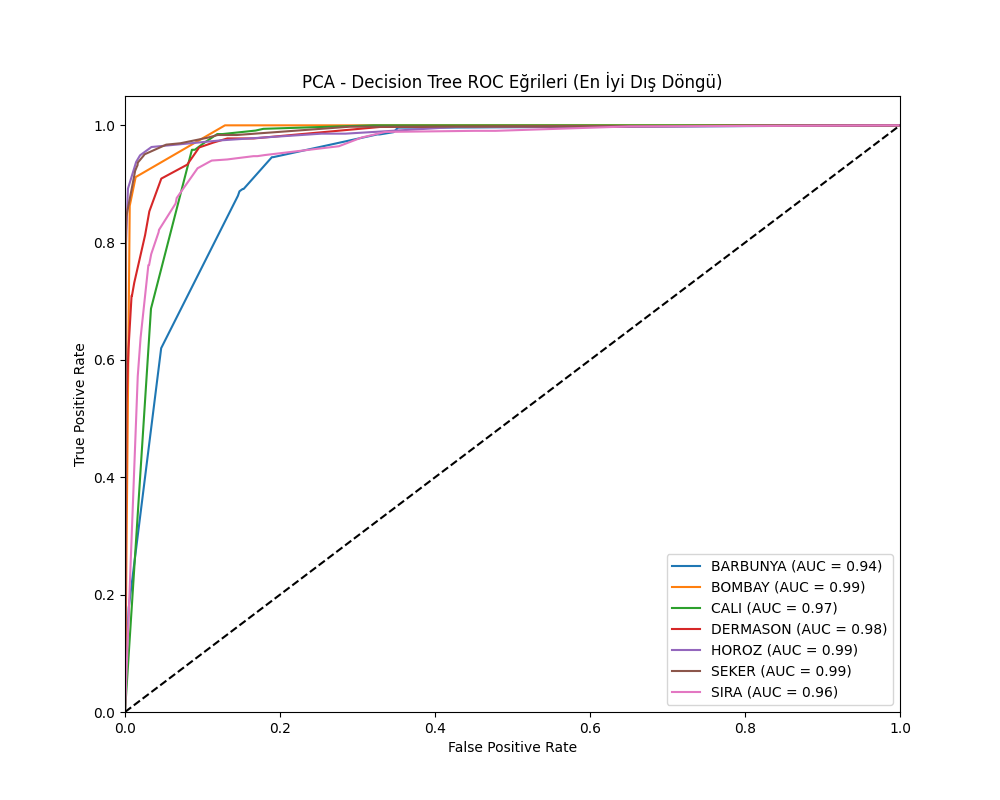


Grafik: ROC_PCA_Random_Forest.png


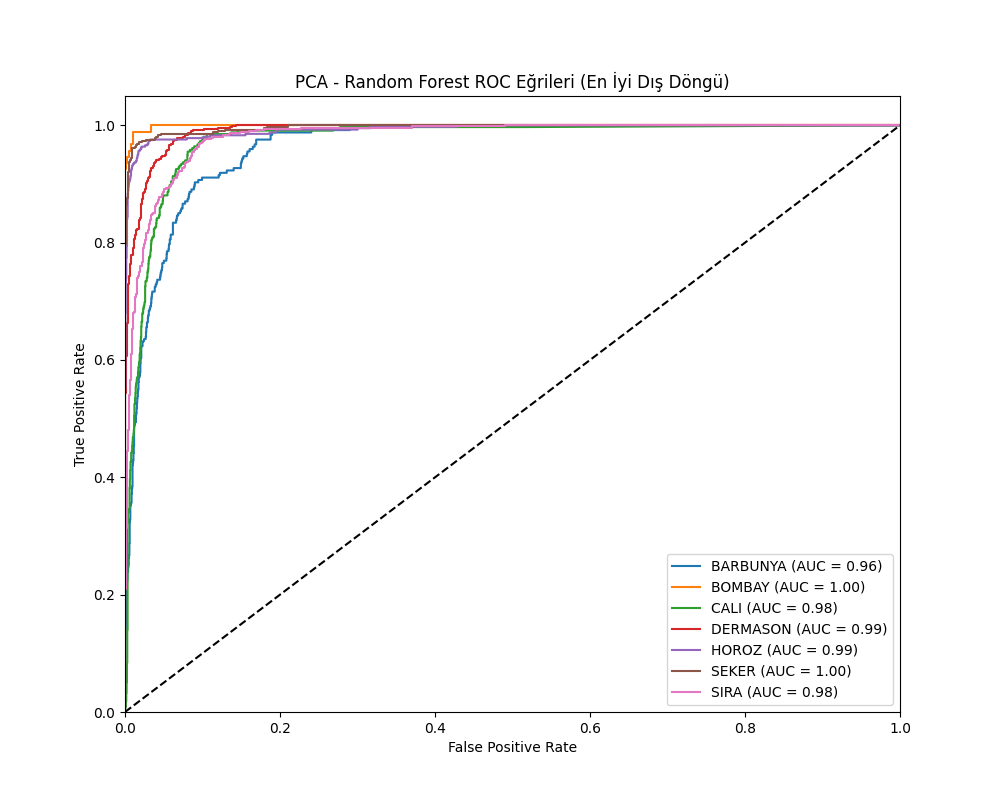


Grafik: ROC_PCA_Logistic_Regression.png


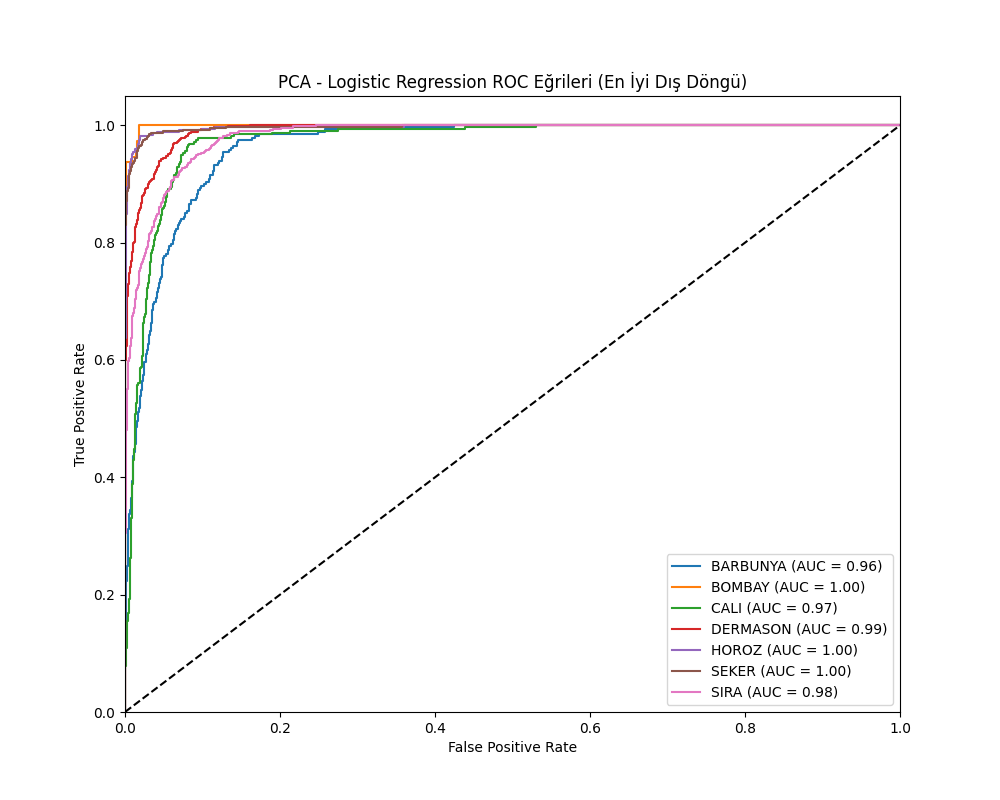


Grafik: ROC_Raw_Random_Forest.png


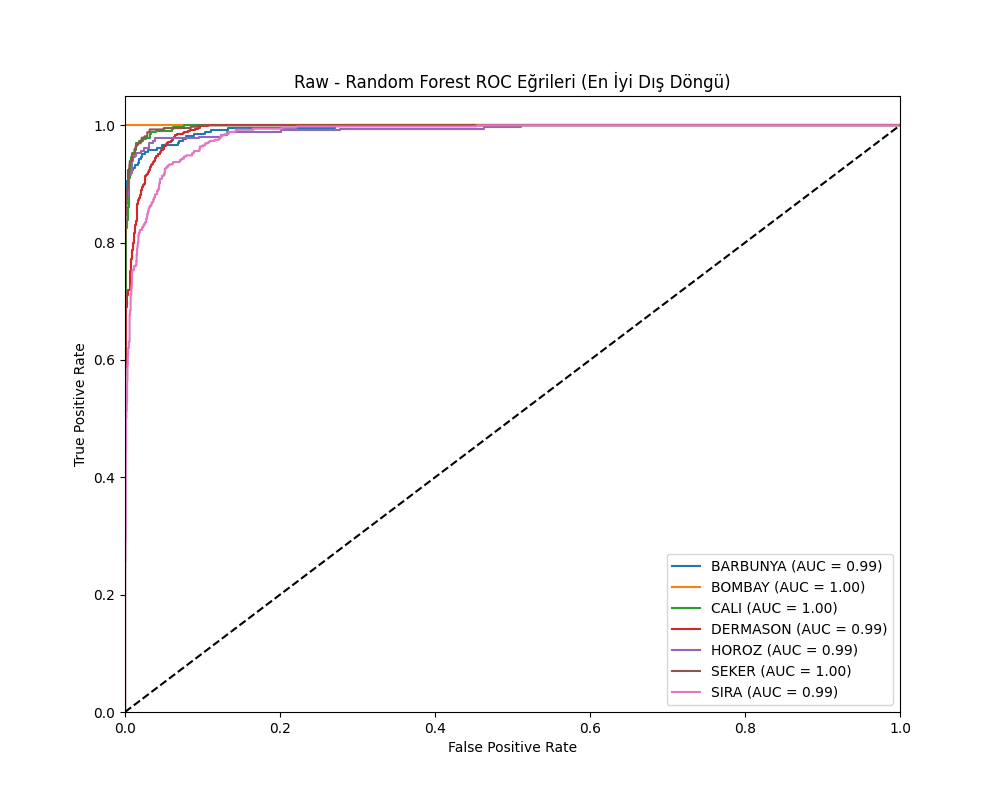


Grafik: ROC_PCA_XGBoost.png


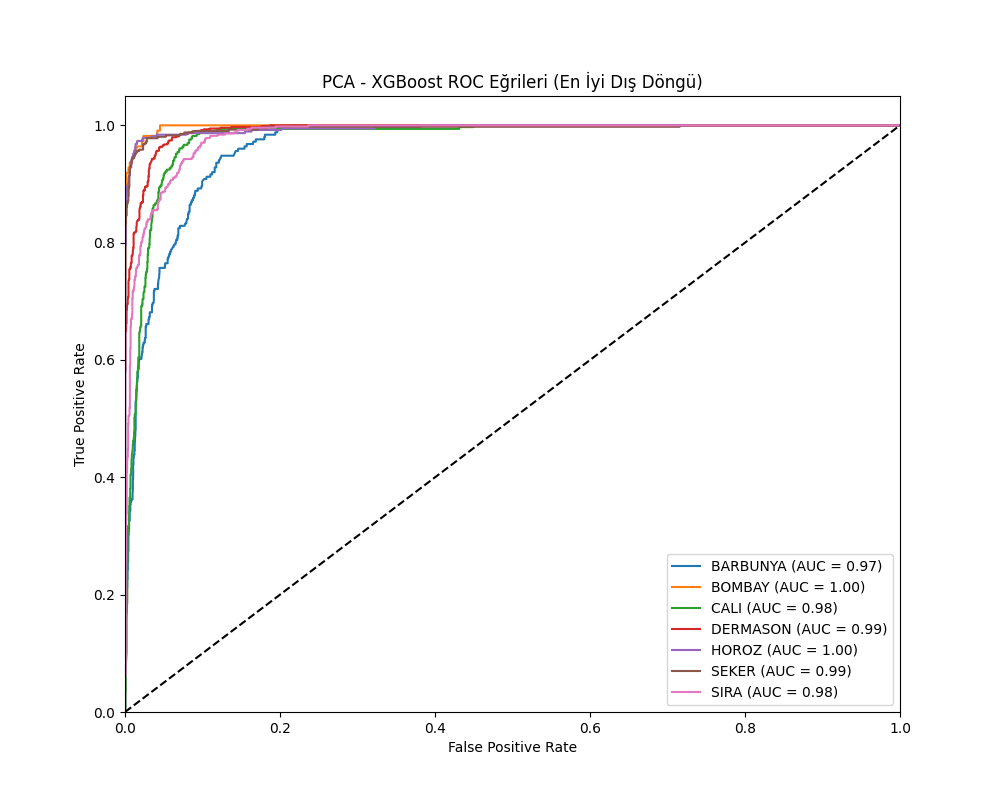


Grafik: ROC_LDA_XGBoost.png


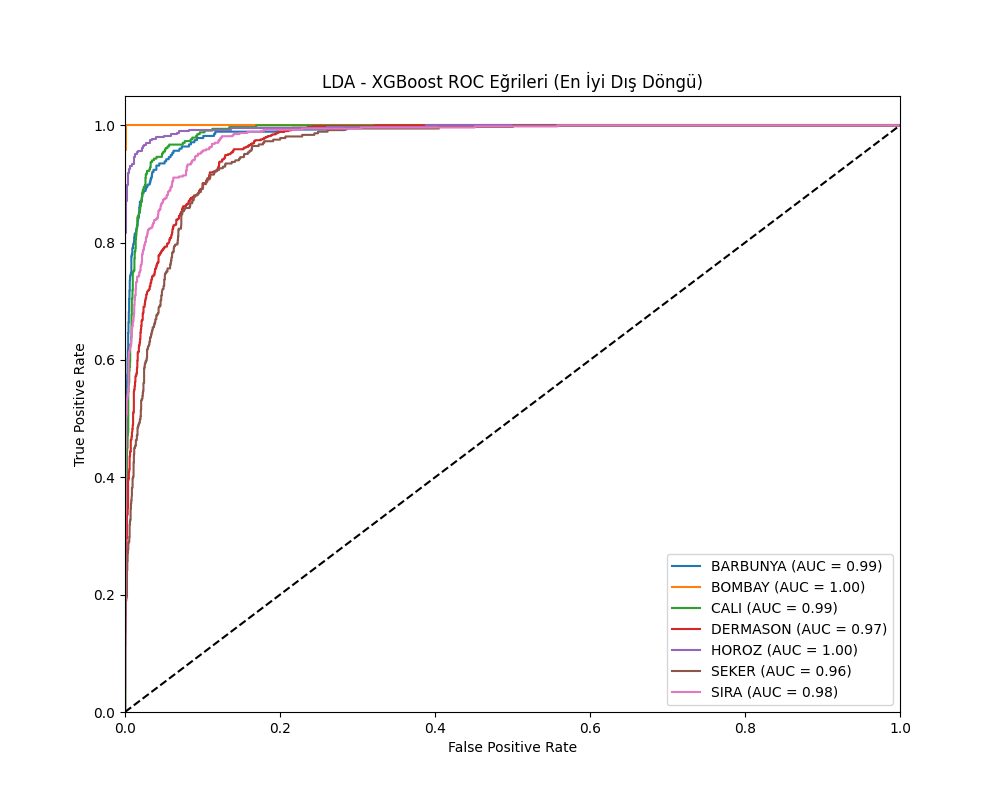


Grafik: ROC_Raw_Naive_Bayes.png


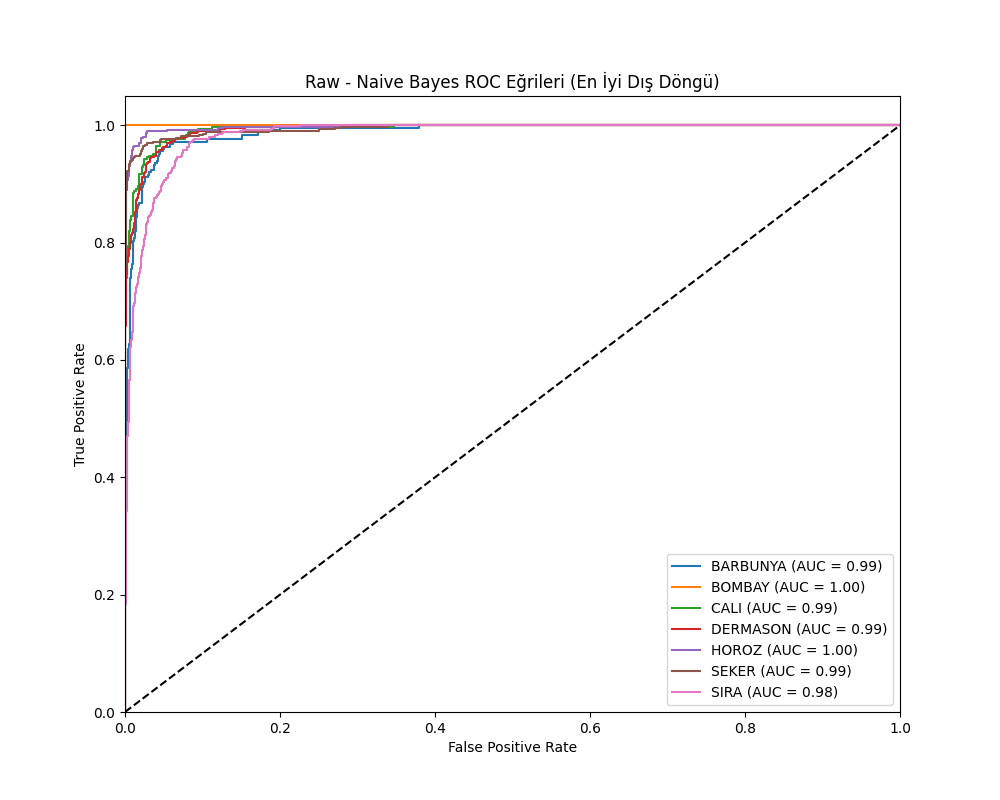


Tüm ROC grafiklerini indirmek için aşağıdaki kodu çalıştırabilirsiniz:

from google.colab import files
for roc_file in roc_files:
    files.download(os.path.join('/content/', roc_file))



In [8]:
import os
from IPython.display import Image, display
from google.colab import files

# ROC grafik dosyalarının bulunduğu dizin
roc_dir = "/content/"

# ROC grafik dosyalarını listele
roc_files = [f for f in os.listdir(roc_dir) if f.startswith("ROC_") and f.endswith(".png")]
print("Bulunan ROC grafik dosyaları:")
for f in roc_files:
    print(f)

# Her ROC grafiğini göster
for roc_file in roc_files:
    print(f"\nGrafik: {roc_file}")
    display(Image(filename=os.path.join(roc_dir, roc_file)))

# Grafikleri indirme seçeneği
print("\nTüm ROC grafiklerini indirmek için aşağıdaki kodu çalıştırabilirsiniz:")
print("""
from google.colab import files
for roc_file in roc_files:
    files.download(os.path.join('/content/', roc_file))
""")


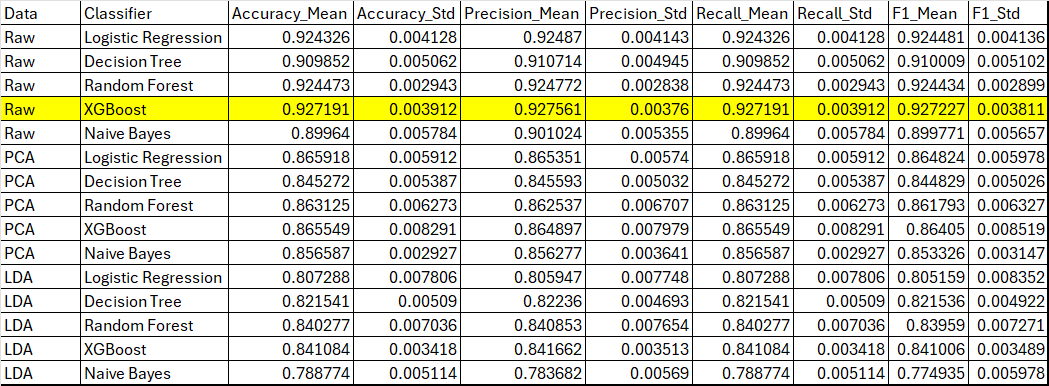

Yapılan analizlerde, sınıflandırma başarımı açısından en yüksek performansın XGBoost algoritması ile ham-Raw veri seti kullanıldığında elde edildiği görülmektedir. Bu kombinasyon, %92.7 doğruluk ve 0.9956 ortalama ROC-AUC değeriyle tüm modeller arasında en üst sırada yer almıştır. Ham veri üzerinde Logistic Regression ve Random Forest da benzer şekilde %92 civarı doğruluk ve çok yüksek ROC-AUC skorlarıyla dikkat çekmektedir. Buna karşın, PCA uygulaması sonrasında tüm modellerde yaklaşık %6-7'lik doğruluk düşüşü yaşanmış ve sınıf ayrımı zayıflamıştır; bu da PCA'nın görselleştirme için faydalı olmasına rağmen sınıflandırma açısından bilgi kaybına yol açtığını göstermektedir. LDA ile elde edilen sonuçlar ise PCA'ya kıyasla biraz daha iyidir ancak yine de ham veri kadar başarılı değildir; özellikle Naive Bayes + LDA kombinasyonu %78.9 doğruluk ve 0.971 ROC-AUC ile en zayıf sonucu vermiştir. Genel olarak, veri üzerinde herhangi bir dönüşüm yapılmadan doğrudan kullanılan ham verinin sınıf ayrımı ve model başarımı açısından en sağlıklı sonuçları verdiği anlaşılmaktadır.